<a href="https://colab.research.google.com/github/jblaszka/ML/blob/main/klasyfikacja_obrazow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set(font_scale=1.3)

In [20]:
(X_train, y_train), (X_test, y_test) = load_data()

In [21]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

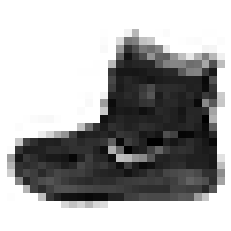

In [24]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

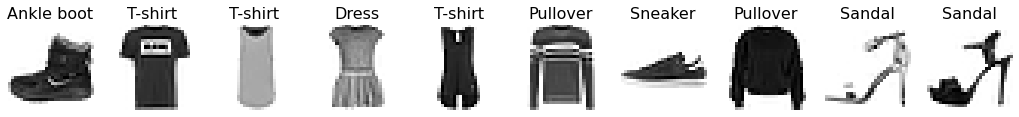

In [25]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [26]:
X_train = X_train / 255.
X_test = X_test / 255.

In [27]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [28]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    import plotly.figure_factory as ff
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=class_names, index=class_names[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=800, height=600, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [ ]:
result = pd.DataFrame(data = {'y_pred' : y_pred , "y_test" :y_test})
result.head(10)

In [ ]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs[:10]

In [ ]:
results.loc[errors_idxs[:10], :]

In [ ]:
plt.figure(figsize=(16, 10))
for idx, error_idx in enumerate(errors_idxs[:15]):
    image = X_test[error_idx].reshape(28, 28)
    plt.subplot(3, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"T:{class_names[results.loc[error_idx, 'y_test']]}-P:{class_names[results.loc[error_idx, 'y_pred']]}")

In [ ]:
len(errors_idxs) / 10000